In [35]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

### Load Packages

In [96]:
# All packages for this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

Text(0, 0.5, 'Region')

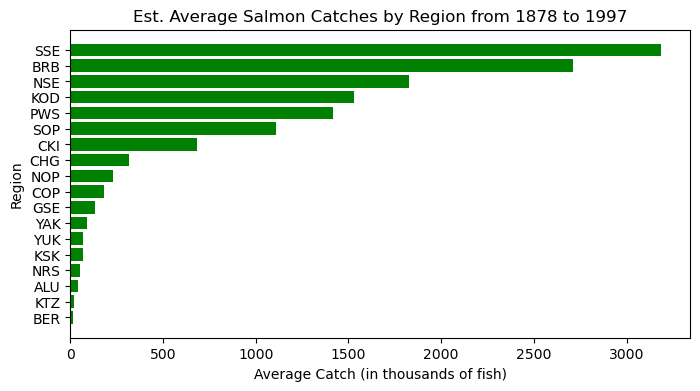

In [125]:
# FINAL CODE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
catch_data = pd.read_csv("data/salmon_data.csv")
notes_unique = catch_data['notesRegCode'].unique()
catch_data = catch_data.drop("notesRegCode", axis = 1)
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_data['Catch'] = catch_data['Catch'].replace('I', 1)
catch_1 = catch_data[catch_data['Catch'] == 1].iloc[0]
catch_data['Catch'] = catch_data['Catch'].astype('int64')
catch_column_type = catch_data['Catch'].dtype
avg_region = catch_data.groupby('Region')['Catch'].mean().reset_index()
sorted_averages = avg_region.sort_values(by = 'Catch')
plt.figure(figsize = (8,4))
plt.barh(sorted_averages['Region'], sorted_averages['Catch'], color = 'green')
plt.title('Est. Average Salmon Catches by Region from 1878 to 1997')
plt.xlabel('Average Catch (in thousands of fish)')
plt.ylabel('Region')

## 1

a. Use this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [126]:
# a.
# Reads in data from our salmon_data.csv
catch_data = pd.read_csv("data/salmon_data.csv")

# Prints out first 5 observations in our salmon data.
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [127]:
# b.

# See the shape of our df aka how many rows/cols
print(f"We have {catch_data.shape[0]} rows, and {catch_data.shape[1]} cols")

# See all the columns in our df
print("Column names:", ", ".join(catch_data.columns))

# See if count of NaN values in each column
print(catch_data.isna().sum())

# See count of unique values within each column
catch_data.nunique()

We have 8540 rows, and 5 cols
Column names: Region, Year, notesRegCode, Species, Catch
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64


Region            18
Year             120
notesRegCode      29
Species            5
Catch           1879
dtype: int64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

**Answer:** For part b, I chose to do some basic but vital data exploration to give me a good first glance idea of whats going on in our data. I chose to figure out the number of rows and columns to see how many observations I'm working with. I also chose to see the column names. I checked for NaN values to quickly spot any potential gaps in the data that might require filling or removal. Knowing the data types of each column ensures I understand which analyses or transformations are possible without errors. Finally, I checked the number of unique values in each column to see the variety of data we have. This helps distinguish between categorical and continuous variables, which is essential for right types of analyses and visualizations.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [128]:
# Store all unique values of column `notesRegCode` into variable notes_unique.
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [129]:
# Dropping `notesRegCode` column
catch_data = catch_data.drop("notesRegCode", axis = 1)

# Check if its still a column name
print("Column names:", ", ".join(catch_data.columns))

Column names: Region, Year, Species, Catch


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


**Answer** No, I would have expected Region and Species to be character Strings and catch to be an int64. Year on the other hand is fine as int64.

In [130]:
# See data types of each column
print(catch_data.dtypes)

Region     object
Year        int64
Species    object
Catch      object
dtype: object


<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [131]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [132]:
# Convert `I` to 1 in our `Catch` column
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [133]:
# Update the value from `I` to 1
catch_data['Catch'] = catch_data['Catch'].replace('I', 1)

# Check if value changed
catch_1 = catch_data[catch_data['Catch'] == 1].iloc[0]
catch_1

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [134]:
# Convert our fixed `Catch` column to int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Store the type of our `Catch` column in a variable
catch_column_type = catch_data['Catch'].dtype
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [135]:
# Mean salmon catch grouped per region stored in a variable.
avg_region = catch_data.groupby('Region')['Catch'].mean().reset_index()
avg_region

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

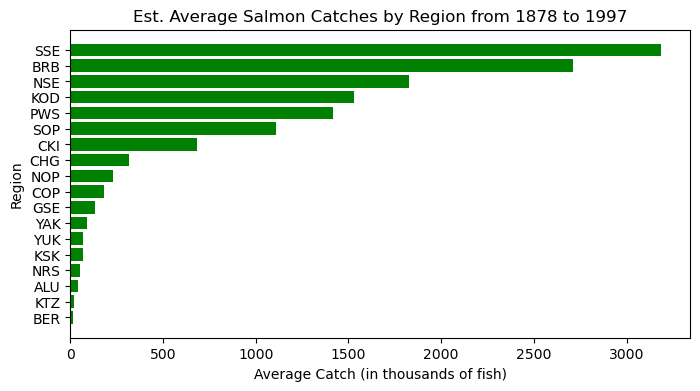

In [136]:
# Sort averages in ascending order
sorted_averages = avg_region.sort_values(by = 'Catch')

# Create an 8in x 4in plot
plt.figure(figsize = (8,4))

# Create a bar plot of sorted averages by region in ascending order
plt.barh(sorted_averages['Region'], sorted_averages['Catch'], color = 'green')

# Plot accessories
plt.title('Est. Average Salmon Catches by Region from 1878 to 1997')
plt.xlabel('Average Catch (in thousands of fish)')
plt.ylabel('Region')

# Display plot
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

**Answer:** Between 1878 to 1997 were the estimated average salmon catches were highest in Southern Southeast Alaska and Bristol Bay Management Area, each exceeding 3,000,000 fish. Northern Southeast Alaska and Kodiak Management Area also had high catches respectively but were far lower than SSE and BRB hovering around 1,500,000 fish. Prince William Sound Subarea and South Peninsula Subarea followed with moderate averages. Lower averages were observed in regions like Unallocated Southeast Alaska, Yakutat, Kuskokwim Management Area, and Aleutian Islands Subarea.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).